In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
from statsmodels.tsa.arima .model import ARIMA
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import pmdarima as pm

In [2]:
#Importing the dataset
df = pd.read_csv("D:\\New folder\\ML\\Completed\\AirBnb.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
1,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600


In [3]:
#Dropping the unneccessary columns
df = df.drop(columns=['Open','High','Low','Close','Volume'])
df

,Date,Adj Close
0,2020-12-10,144.710007
1,2020-12-11,139.250000
2,2020-12-14,130.000000
3,2020-12-15,124.800003
4,2020-12-16,137.990005
...,...,...
772,2024-01-08,140.080002
773,2024-01-09,139.529999
774,2024-01-10,139.759995
775,2024-01-11,139.449997


In [4]:
df.describe()

,Adj Close
count,777.000000
mean,139.296043
std,28.739090
min,82.489998
25%,116.610001
50%,137.539993
75%,161.830002
max,216.839996


In [5]:
df.set_index('Date',inplace=True)

In [6]:
df

,Adj Close
Date,
2020-12-10,144.710007
2020-12-11,139.250000
2020-12-14,130.000000
2020-12-15,124.800003
2020-12-16,137.990005
...,...
2024-01-08,140.080002
2024-01-09,139.529999
2024-01-10,139.759995


In [7]:
rcParams['figure.figsize'] = 15, 7

<Axes: xlabel='Date'>

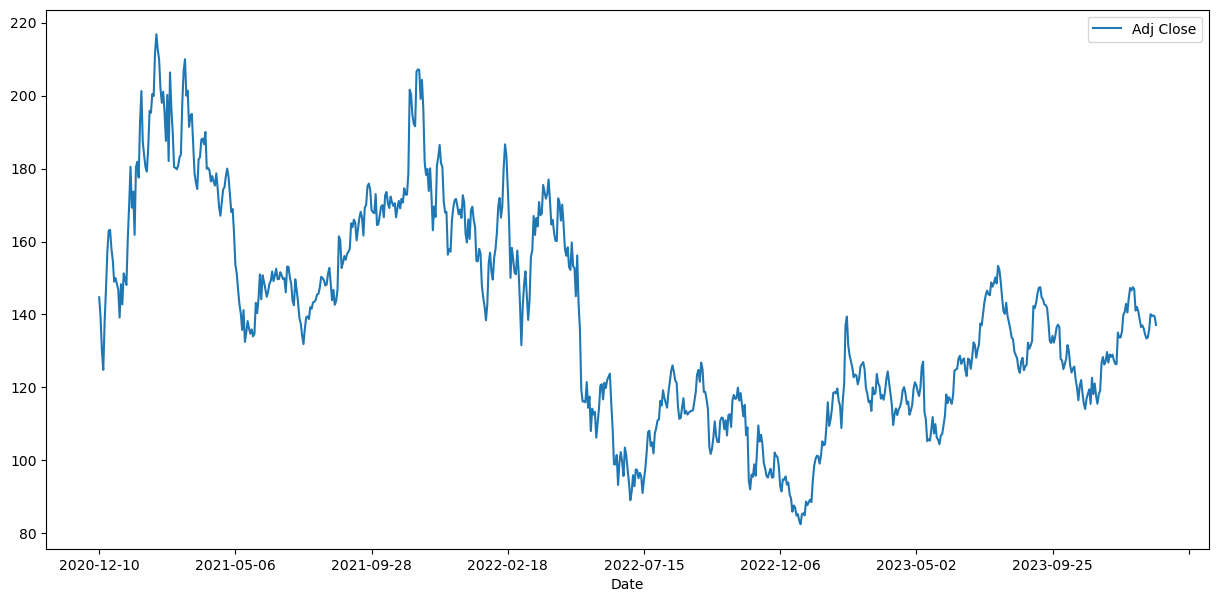

In [8]:
df.plot()

In [9]:
# Testing for data stationarity
result = adfuller(df['Adj Close'].diff(periods=12).dropna())
result[1]
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [10]:
test_result=adfuller(df['Adj Close'])

* **H0**: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt. The time series has a unit root; it is non-stationary.

* **H1**: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0. The time series does not have a unit root; it is stationary.

In [11]:
def adfuller_test(x):
    result = adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [12]:
adfuller_test(df['Adj Close'])

ADF Test Statistic : -2.16595487495109
p-value : 0.21883301940030286
#Lags Used : 3
Number of Observations : 773
weak evidence against null hypothesis,indicating it is non-stationary 


In [13]:
model = pm.auto_arima(df, seasonal=False, suppress_warnings=True)
model

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
#Differencing the data for the first time
df['First Dif'] = df['Adj Close'].diff()

In [15]:
# Again testing if data is stationary
adfuller_test(df['First Dif'].dropna())

ADF Test Statistic : -17.52163945546122
p-value : 4.282405759397976e-30
#Lags Used : 2
Number of Observations : 773
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<Axes: xlabel='Date'>

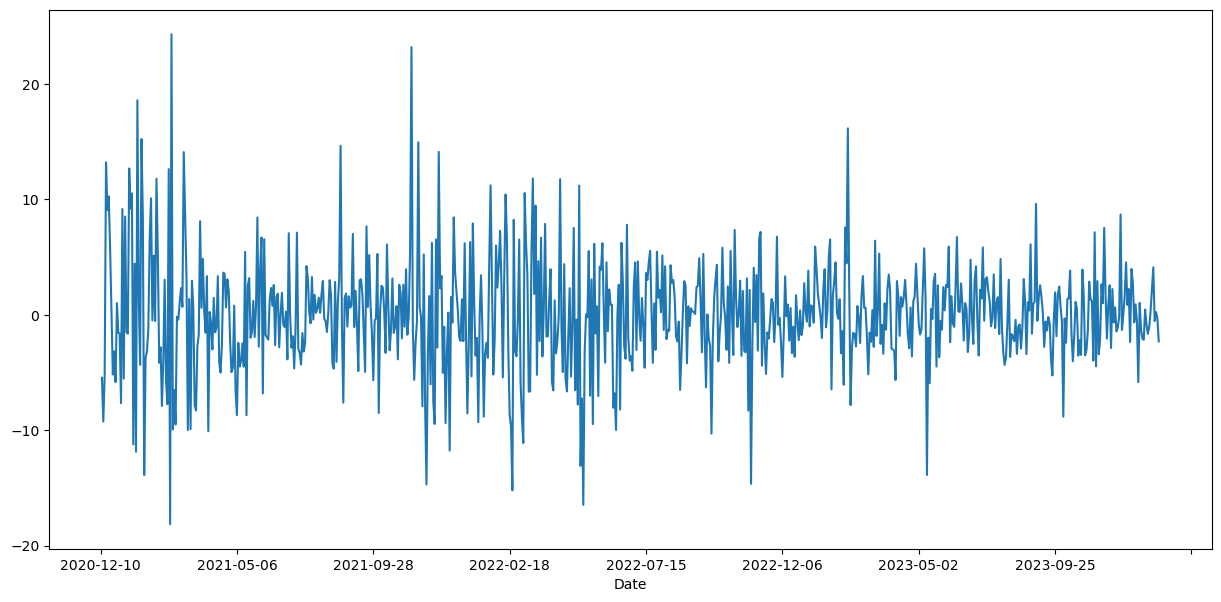

In [16]:
df['First Dif'].plot()

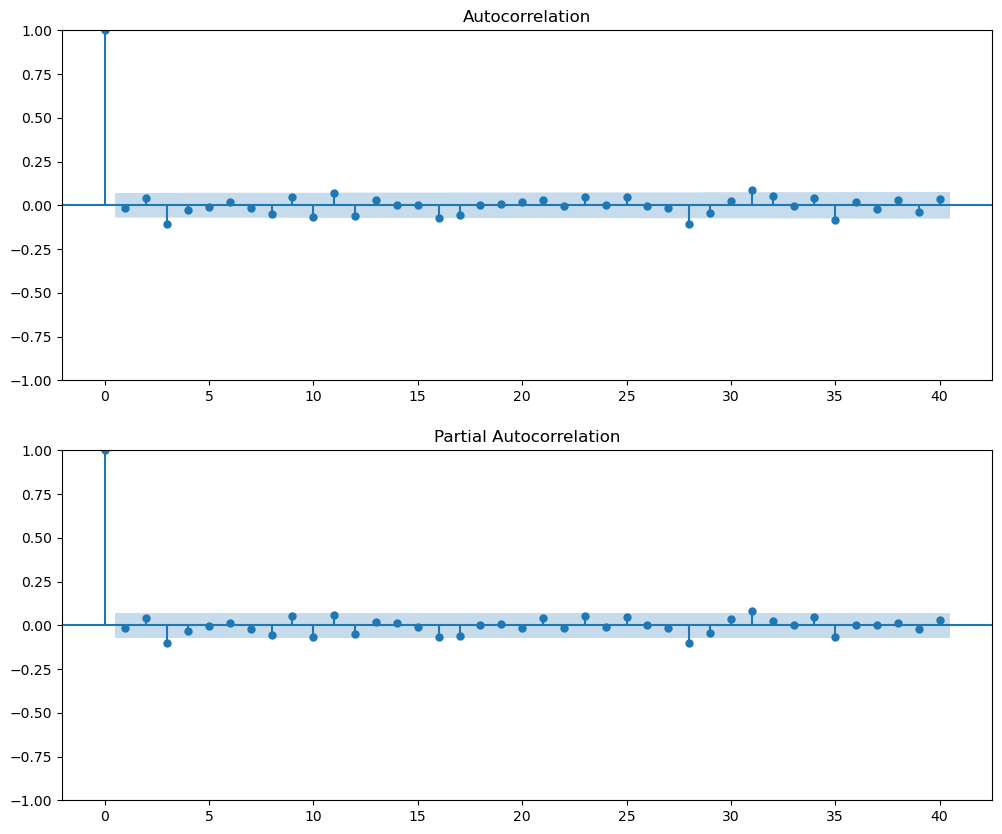

In [17]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['First Dif'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['First Dif'].dropna(),lags=40,ax=ax2)

In [18]:
model=ARIMA(df['Adj Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\User\anaconda3\envs\Research\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\Research\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\Research\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\Research\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameter

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  777
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2315.493
Date:                Tue, 16 Jan 2024   AIC                           4636.987
Time:                        11:19:40   BIC                           4650.949
Sample:                             0   HQIC                          4642.358
                                - 777                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6829      0.276     -2.476      0.013      -1.223      -0.142
ma.L1          0.6436      0.287      2.242      0.025       0.081       1.206
sigma2        22.8713      0.815     28.054      0.000      21.273      24.469
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):               197.55
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#df['forecast']=model_fit.predict(start=100,end=776,dynamic=True)
#df[['Adj Close','forecast']].plot(figsize=(12,8))
forecast=model_fit.predict(start=100,end=776,dynamic=True)

C:\Users\User\anaconda3\envs\Research\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\Research\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\Research\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\envs\Research\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

<Axes: xlabel='Date'>

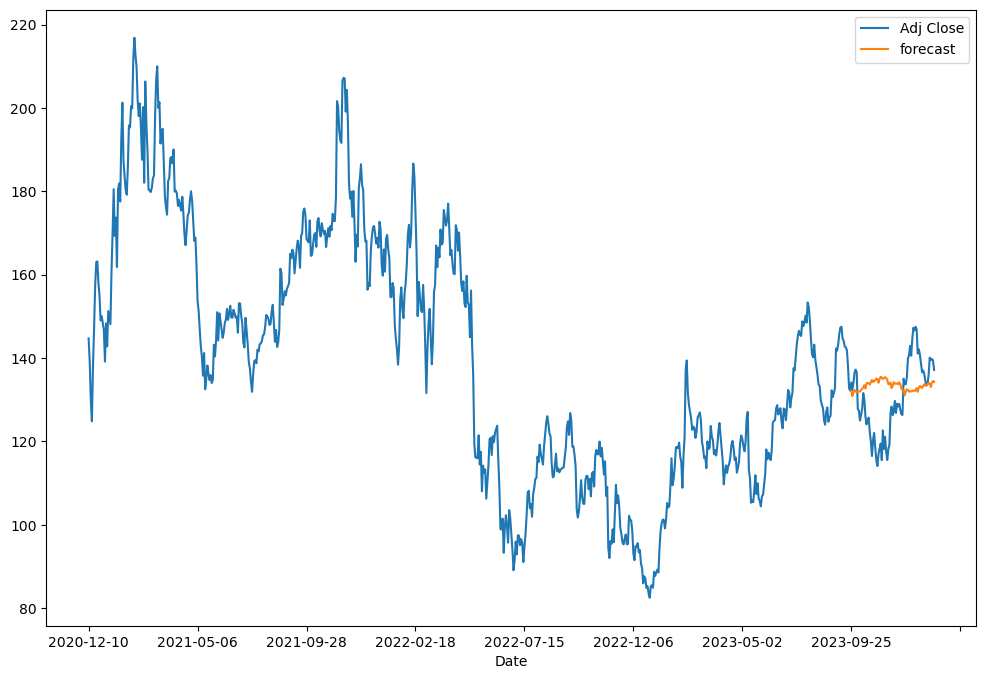

In [19]:
model=sm.tsa.statespace.SARIMAX(df['Adj Close'],order=(1, 1, 1),seasonal_order=(4,1,4,12))
results=model.fit()
df['forecast']=results.predict(start=700,end=776,dynamic=True)
df[['Adj Close','forecast']].plot(figsize=(12,8))

In [20]:
car = df[700:776]

In [21]:
df['forecast']

Date
2020-12-10           NaN
2020-12-11           NaN
2020-12-14           NaN
2020-12-15           NaN
2020-12-16           NaN
                 ...    
2024-01-08    133.897882
2024-01-09    133.048934
2024-01-10    134.018255
2024-01-11    134.480019
2024-01-12    134.299389
Name: forecast, Length: 777, dtype: float64

In [22]:
#Calculating the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((car - forecast) / car)) * 100
mape

NameError: name 'forecast' is not defined